In [15]:
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import re

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [6]:
df1 = pandas.read_json("izvestiia_complete.json")

In [8]:
df1

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas,lemmas_string
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,\t\t марта года\n\nФУТБОЛ ИГРА БОРЬБА ПРАЗДН...,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,а\n\n\tа\t\n\n\t\t\t\t Подробности длл\n\nСто ...,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии \t \n\nСовместное советско малайзийск...,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ\t по странам и континентам\t\t \n\...,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\n\tГ О СТРАНАМ ИР НСНТИНЕНТАМ ...,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...
...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...


In [10]:
df = df1[['text', 'year', 'filename']]

In [12]:
def text_cleaner(text):
    return re.sub('[^а-яА-Я\s.,?!]', '', text)

In [13]:
def text_cleaner2(text):
    clean_text = text.replace("\n", "").replace("/t", "").replace("\t", "")
    return clean_text

In [16]:
df['clean'] = df['text'].apply(text_cleaner)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df['clean_2'] = df['clean'].apply(text_cleaner2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
import stanza

In [21]:
stanza.download('ru')

2020-05-19 14:48:13 INFO: Downloading default packages for language: ru (Russian)...
2020-05-19 14:48:16 INFO: File exists: /Users/Leha/stanza_resources/ru/default.zip.
2020-05-19 14:48:23 INFO: Finished downloading models and saved to /Users/Leha/stanza_resources.


In [125]:
# stop words dont work
def sen_token(word_list):
    sen = []
    doc = nlp(word_list)
    for sentence in doc.sentences:
            for token in sentence.tokens:
                sen.append(token.text)
    return sen

In [26]:
def sen_tokenize(word_list):
    sen = []
    doc = nlp(word_list)
    for sentence in doc.sentences:
        sen.append(sentence.text)
    return sen

In [27]:
import stanfordnlp
from spacy_stanfordnlp import StanfordNLPLanguage
import spacy

In [29]:
snlp = stanfordnlp.Pipeline(lang="ru", processors='tokenize,lemma') 
nlp = StanfordNLPLanguage(snlp)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---


In [30]:
nlp.Defaults.stop_words

{'а',
 'будем',
 'будет',
 'будете',
 'будешь',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вами',
 'вас',
 'весь',
 'во',
 'вот',
 'все',
 'всего',
 'всей',
 'всем',
 'всеми',
 'всему',
 'всех',
 'всею',
 'всея',
 'всю',
 'вся',
 'всё',
 'всём',
 'вы',
 'да',
 'для',
 'до',
 'его',
 'едим',
 'едят',
 'ее',
 'ей',
 'ел',
 'ела',
 'ем',
 'ему',
 'емъ',
 'если',
 'ест',
 'есть',
 'ешь',
 'еще',
 'ещё',
 'ею',
 'её',
 'же',
 'за',
 'и',
 'из',
 'или',
 'им',
 'ими',
 'имъ',
 'их',
 'к',
 'как',
 'кем',
 'ко',
 'когда',
 'кого',
 'ком',
 'кому',
 'комья',
 'которая',
 'которого',
 'которое',
 'которой',
 'котором',
 'которому',
 'которою',
 'которую',
 'которые',
 'который',
 'которым',
 'которыми',
 'которых',
 'кто',
 'меня',
 'мне',
 'мной',
 'мною',
 'мог',
 'моги',
 'могите',
 'могла',
 'могли',
 'могло',
 'могу',
 'могут',
 'мое',
 'моего',
 'моей',
 'моем',
 'моему',
 'моею',
 'можем',
 'может',
 'можете',
 'мо

In [31]:
stop_words = nlp.Defaults.stop_words

In [32]:
stop_words |= {'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 
               'ц', 'ч', 'ш', 'э', 'ю',}

In [33]:
len(stop_words)

283

In [35]:
nlp = stanza.Pipeline('ru', processors = 'tokenize')

2020-05-19 14:52:02 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |

2020-05-19 14:52:02 INFO: Use device: cpu
2020-05-19 14:52:02 INFO: Loading: tokenize
2020-05-19 14:52:02 INFO: Done loading processors!


In [39]:
df['sent_tokens'] = df['clean_2'].apply(lambda x: [sen_token_tokenize(s) for s in sen_tokenize(x)])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df

,text,year,filename,clean,clean_2,sent_tokens
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,"\t\t марта года\n\nФУТБОЛ ИГРА, БОРЬБА,, ПРА...","марта годаФУТБОЛ ИГРА, БОРЬБА,, ПРАЗДНИКТУР...","[[марта, годаФУТБОЛ, ИГРА, ,, БОРЬБА, ,, ,, ПР..."
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,а.\n\n\tа\t\n\n\t\t\t\t Подробности длл\n\nСто...,а.а Подробности дллСто пятьдесят переговоров с...,"[[а.а], [Подробности, дллСто, пятьдесят, перег..."
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,известии \t ...\n\nСовместное советско малайзи...,известии ...Совместное советско малайзийское ...,"[[известии, ., ., ., Совместное, советско, мал..."
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,ИЗВЕСТИЯ\t по странам и континентам\t\t \n\...,ИЗВЕСТИЯ по странам и континентам марта ...,"[[ИЗВЕСТИЯ, по, странам, и, континентам, марта..."
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ . ...,ИЗВЕСТИЯГ! О СТРАНАМ ИР НСНТИНЕНТАМ . мар...,"[[ИЗВЕСТИЯГ, !], [О, СТРАНАМ, ИР, НСНТИНЕНТАМ,..."
...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологиче..."
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[[ИЗВЕСТИЯ, января, года, В, соответствии, с, ..."
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫ..."
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[[ИЗВЕСТИЯ, ноября, года, Так, считает, предсе..."


In [41]:
export_json = df.to_json('izvestiia_sent_tokens.json')

In [42]:
export_csv = df.to_csv('izvestiia_sent_tokens.csv')

# Word2Vec

In [45]:
izvestiiaW2V = gensim.models.word2vec.Word2Vec(df['sent_tokens'].sum())

In [46]:
izvestiiaW2V['ссср'][:10]

array([ 0.0124428 , -0.05012865, -0.04389233,  0.04820009,  0.04218102,
        0.07006496,  0.0022121 , -0.01506195, -0.04951769,  0.05339473],
      dtype=float32)

In [47]:
izvestiiaW2V.most_similar('депутат')

[('народный', 0.9245763421058655),
 ('профессор', 0.9021775126457214),
 ('академик', 0.9001409411430359),
 ('старший', 0.8989189267158508),
 ('Виктор', 0.8965216875076294),
 ('артист', 0.89382404088974),
 ('депутата', 0.8922584056854248),
 ('Андрей', 0.8920473456382751),
 ('Михайлов', 0.889057993888855),
 ('Ф.', 0.8887590169906616)]

In [48]:
izvestiiaW2V.most_similar('союз')

[('Министерством', 0.8991108536720276),
 ('братского', 0.8930282592773438),
 ('Силами', 0.8866400122642517),
 ('Кубы', 0.8860230445861816),
 ('Вооруженными', 0.8806061744689941),
 ('Европейского', 0.8783504962921143),
 ('Литвы', 0.8768715858459473),
 ('ассоциации', 0.8761379718780518),
 ('Демократической', 0.8761025667190552),
 ('Североатлантического', 0.8754379749298096)]

In [55]:
izvestiiaW2V.most_similar('банк')

[('Банк', 0.7881683111190796),
 ('коммерческий', 0.7626004815101624),
 ('государственный', 0.7358527779579163),
 ('акционерный', 0.7345622181892395),
 ('Российский', 0.7340372800827026),
 ('кредит', 0.7320775985717773),
 ('фонд', 0.7159553170204163),
 ('национальный', 0.7157984972000122),
 ('банка', 0.7154874801635742),
 ('Центральный', 0.7101889848709106)]

In [49]:
numWords = 50
targetWords = izvestiiaW2V.wv.index2word[:numWords]

In [50]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.11543918, -1.0884497 , -0.60553014, ...,  1.2137176 ,
         0.6482143 , -0.3660888 ],
       [-0.7779195 , -1.2598478 , -0.02988439, ...,  0.45737487,
         0.190256  , -1.3763638 ],
       [ 0.83155036,  0.20782451, -0.618364  , ...,  0.25731498,
        -0.49746615, -0.5578881 ],
       ...,
       [-0.26419565, -1.3159727 , -0.7673314 , ...,  3.6896143 ,
        -0.25318944, -1.4831132 ],
       [ 4.3856325 ,  0.36590046, -0.50768113, ...,  0.52675796,
        -0.01624961,  0.7990094 ],
       [ 1.533297  , -1.4345372 , -0.7944282 , ...,  0.22175778,
         0.22749878, -0.6960961 ]], dtype=float32)

In [51]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

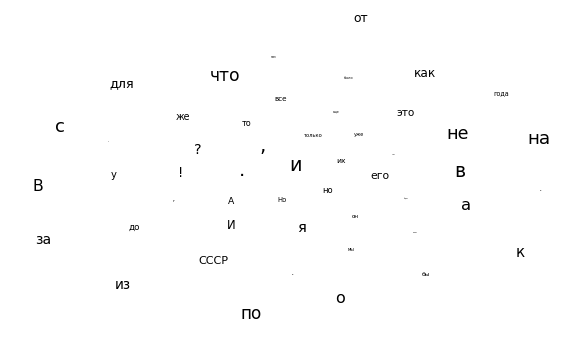

In [52]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [166]:
targetWords = izvestiiaW2V.wv.index2word[100:200]

In [170]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.13832447, -1.3124536 , -0.95232266, ..., -1.0895823 ,
         0.6756284 , -2.5550368 ],
       [ 1.9324243 , -0.05268153, -0.8995187 , ...,  0.49310702,
        -0.17673565,  0.13981001],
       [ 0.49879965,  1.1358192 ,  1.256653  , ...,  0.7533142 ,
        -0.60027796, -0.5751293 ],
       ...,
       [ 1.6126277 , -2.5244584 , -1.1180469 , ...,  0.09373738,
        -0.8403382 , -3.5318925 ],
       [-0.19214056, -0.7361116 ,  0.07689981, ...,  1.5338025 ,
         1.3283285 ,  0.5039806 ],
       [ 0.5753758 ,  0.2824405 , -0.38621646, ..., -0.4750067 ,
         0.20913018,  0.10772103]], dtype=float32)

In [171]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

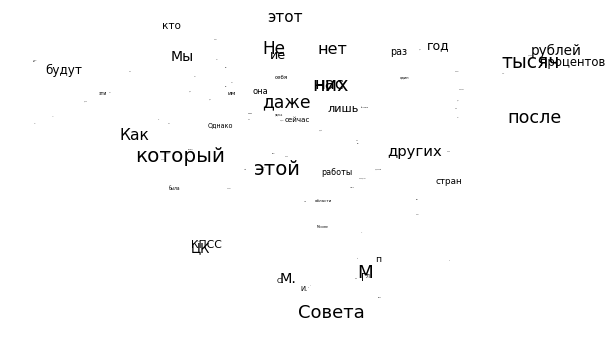

In [172]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [281]:
numWords = 50
targetWords = izvestiiaW2V.wv.index2word[:numWords]

In [282]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [286]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
IsoWords = sklearn.manifold.Isomap(n_components = 2).fit_transform(reducedPCA_data)

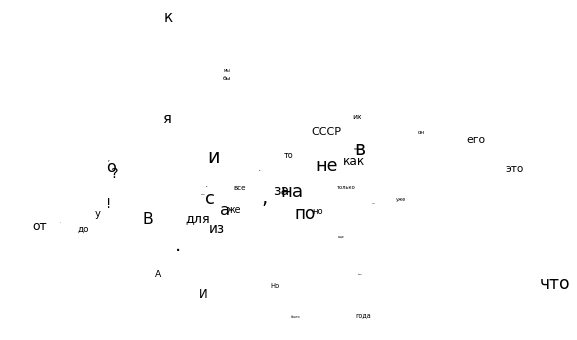

In [287]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(IsoWords[:, 0], IsoWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (IsoWords[:, 0][i],IsoWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [288]:
targetWords = izvestiiaW2V.wv.index2word[100:200]

In [289]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [290]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
IsoWords = sklearn.manifold.Isomap(n_components = 2).fit_transform(reducedPCA_data)

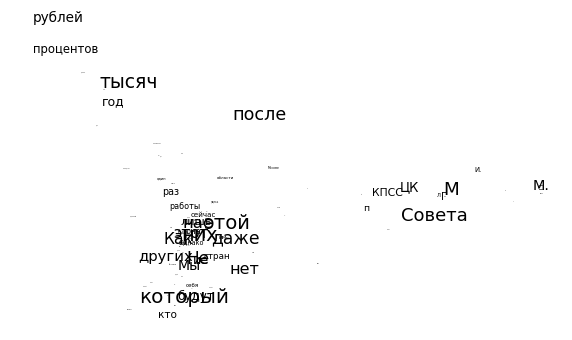

In [291]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(IsoWords[:, 0], IsoWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (IsoWords[:, 0][i],IsoWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [294]:
targetWords = izvestiiaW2V.wv.index2word[100:200]

In [295]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [296]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
LLEWords = sklearn.manifold.LocallyLinearEmbedding(n_components = 2).fit_transform(reducedPCA_data)

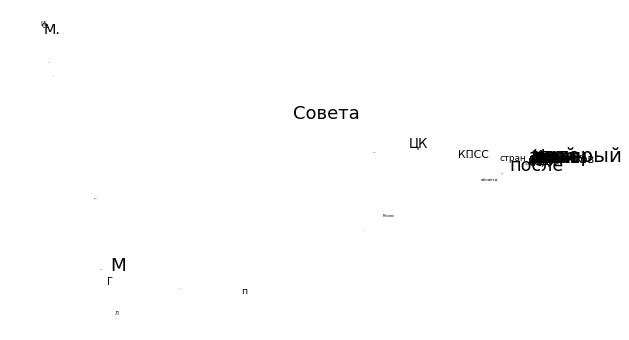

In [297]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(LLEWords[:, 0], LLEWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (LLEWords[:, 0][i],LLEWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [298]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
MDSWords = sklearn.manifold.MDS(n_components = 2).fit_transform(reducedPCA_data)

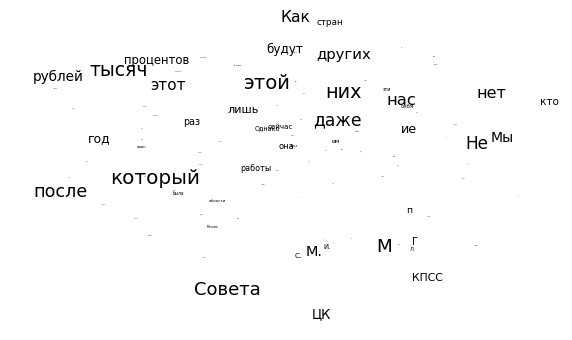

In [299]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(MDSWords[:, 0], MDSWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (MDSWords[:, 0][i],MDSWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [57]:
izvestiiaW2V.doesnt_match(["ссср", 'коммунизм', 'союз', 'социализм', 'депутат'])

'депутат'

In [66]:
izvestiiaW2V.most_similar(positive=['демократия', 'Горбачев'], negative = ['коммунизм'])

[('М.', 0.7839202880859375),
 ('С.', 0.7745994925498962),
 ('Ярных', 0.75282883644104),
 ('Горбачева', 0.736815333366394),
 ('Ельцин', 0.7190157175064087),
 ('говорил', 0.7025200128555298),
 ('Рябов', 0.7020187973976135),
 ('Очевидцы', 0.6984454989433289),
 ('пишет', 0.6897454261779785),
 ('Рахманинов', 0.6880301237106323)]

In [69]:
izvestiiaW2V.most_similar(positive=['союз', 'советский'], negative = ['федерация'])

[('глава', 0.7138544321060181),
 ('руководитель', 0.7118391990661621),
 ('Президент', 0.7103844881057739),
 ('выразил', 0.7039642333984375),
 ('лидер', 0.7010303735733032),
 ('бывший', 0.6948716640472412),
 ('президент', 0.6906145811080933),
 ('Ельцин', 0.6847422122955322),
 ('Союз.', 0.6795715093612671),
 ('Союз', 0.6769667863845825)]

In [183]:
izvestiiaW2V.most_similar(positive=['союз', 'колхоз'], negative = ['банк'])

[('королевских', 0.848339319229126),
 ('сплоченной', 0.8436034917831421),
 ('выраженное', 0.843562126159668),
 ('Голоса', 0.8395053148269653),
 ('авторитетов', 0.8372204303741455),
 ('становились', 0.8328097462654114),
 ('нацистов', 0.8319162130355835),
 ('смыкаются', 0.8268074989318848),
 ('Собравшиеся', 0.824552595615387),
 ('Народы', 0.8245038390159607)]

In [184]:
izvestiiaW2V.most_similar(positive=['союз', 'совет'], negative = ['банк'])

[('Израиля', 0.8482199907302856),
 ('глав', 0.8475713729858398),
 ('правительств', 0.8386114835739136),
 ('членами', 0.8371542692184448),
 ('лидеров', 0.8302909731864929),
 ('солидарности', 0.8272914886474609),
 ('представителями', 0.8223294019699097),
 ('прокуратуры', 0.8117510080337524),
 ('общественности', 0.8085099458694458),
 ('участниц', 0.8078860640525818)]

In [185]:
izvestiiaW2V.most_similar(positive=['союз', 'ссср'], negative = ['банк'])

[('деятелями', 0.847201943397522),
 ('консенсуса', 0.8344744443893433),
 ('солидарности', 0.8318921327590942),
 ('братской', 0.8280216455459595),
 ('щейся', 0.8251439332962036),
 ('представи', 0.8215339183807373),
 ('ближневосточных', 0.8172136545181274),
 ('Обществом', 0.8163650035858154),
 ('АСЕАН', 0.8150444030761719),
 ('учеными', 0.8130583763122559)]

In [186]:
izvestiiaW2V.most_similar(positive=['союз', 'банк'], negative = ['совет'])

[('швейцарский', 0.731383204460144),
 ('акционерный', 0.7301896810531616),
 ('фонд', 0.7293187975883484),
 ('Российский', 0.7153651714324951),
 ('австрийский', 0.7143989205360413),
 ('Банк', 0.7087201476097107),
 ('Норильский', 0.7065578699111938),
 ('доллар', 0.7048720121383667),
 ('РАО', 0.704056441783905),
 ('крона', 0.7018262147903442)]

In [187]:
izvestiiaW2V.most_similar(positive=['рубль', 'банк'], negative = ['союз'])

[('кредит', 0.7901530265808105),
 ('завод', 0.7598676681518555),
 ('доллар', 0.7304578423500061),
 ('стерлингов', 0.7018349170684814),
 ('руб.', 0.6861395835876465),
 ('руб', 0.6792101860046387),
 ('цена', 0.6740419268608093),
 ('фунт', 0.6632956266403198),
 ('Российский', 0.6556909680366516),
 ('вложенный', 0.6534066200256348)]

In [188]:
izvestiiaW2V.most_similar(positive=['рубль', 'союз'], negative = ['банк'])

[('Закавказья', 0.8228087425231934),
 ('Пермской', 0.8127593994140625),
 ('районными', 0.809249997138977),
 ('фестивалей', 0.8066403865814209),
 ('сборных', 0.8058899641036987),
 ('дальнего', 0.8001370429992676),
 ('Кореи', 0.7997785806655884),
 ('ближнего', 0.7966890335083008),
 ('СевероЗападного', 0.7930302023887634),
 ('Осетии', 0.7918949127197266)]

In [189]:
izvestiiaW2V.most_similar(positive=['банк', 'союз'], negative = ['рубль'])

[('союза', 0.7828406095504761),
 ('Организации', 0.7792372703552246),
 ('директоров', 0.7659929394721985),
 ('орган', 0.7637766003608704),
 ('комитета', 0.7588459253311157),
 ('федерации', 0.7585683465003967),
 ('Наций', 0.7584417462348938),
 ('Федерации', 0.7512723803520203),
 ('комитет', 0.7467935681343079),
 ('ассоциации', 0.7460079789161682)]

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

What this has demonstrated, once again, is that my corpus has a lot of garbage in it. Looking at the word clouds, it is clearly visible that there is a lot of meaningless junk floating around. And yet, when I was able to discover a more legible portion of words, a disticnt pattern emerged. Words relating to the Soviet Union, such as Central Committee and Communist Party were always seperated from words relating to a merket economy, such as ruble, thousands, and percent. This pattern repeated itself across all of the specifications that I applied. This indicates quite strongly that a discourse about the market was incompatible with a Soviet discourse. 

Testing this relationship further by looking at similarity ratings and additiona and subtraction validated this conclusion. The words Bank and Ruble relate to each other just as Union related to Committee for example, once again suggesting a divide between these two areas. 

Taking this relationship a step furhter I investigated relationships between words relating to democracy and words relating to communism. Again, a similar pattern emerged. If we add Union and Soviet, and subtract Federation, the result is President, Leader and Yeltsin. A similar pattern emerges if we compare the two systems directly. Democracy is to Communism what Gorbachev is to Yeltsin. Clearly within the semantic space of my corpus there is a strong divide/antagonism between the Soviet semantic space and a Market and Democractic Space.

In terms of the estimation and visualization, ISO, TSNE, and MDS worked well, both drawing similar results, distinctly separating Communist and market words. LLE did not work at all well, just clumping everything together. 

# Doc 2 Vec

In [212]:
keywords = ['ссср', 'союз', 'советский', 'банк', 'акция', 'свобода', 'ельцин', 'горбачев']

In [71]:
df = pandas.read_json("izvestiia_complete.json")

In [72]:
df

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas,lemmas_string
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,\t\t марта года\n\nФУТБОЛ ИГРА БОРЬБА ПРАЗДН...,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,а\n\n\tа\t\n\n\t\t\t\t Подробности длл\n\nСто ...,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии \t \n\nСовместное советско малайзийск...,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ\t по странам и континентам\t\t \n\...,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\n\tГ О СТРАНАМ ИР НСНТИНЕНТАМ ...,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...
...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...


In [214]:
taggedDocs = []
for index, row in df.iterrows():
    docKeywords = [s for s in keywords if s in row['lemmas']]
    docKeywords.append(row['year'])
    docKeywords.append(row['filename'])
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['lemmas'], tags = docKeywords))
df['tagged_text'] = taggedDocs

In [215]:
izD2V = gensim.models.doc2vec.Doc2Vec(df['tagged_text'], size = 100)

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [77]:
izD2V.docvecs[1997]

array([ 4.0382404 ,  1.1560782 , -6.3087196 , -6.2656918 , -2.3509123 ,
       -1.6540613 ,  0.8258199 ,  1.4488547 , -0.11151542,  2.3626318 ,
       -2.6185431 , -0.56619424, -1.8024113 ,  0.5543326 , -1.5965582 ,
       -0.8452318 ,  1.9747015 , -0.03166691,  0.7659971 , -0.95282257,
        1.4014354 , -1.7686336 ,  1.0050931 , -1.9414228 , -0.4802329 ,
       -2.1487176 , -2.6316395 ,  0.9360717 , -1.2614133 , -2.339584  ,
        0.6791806 ,  0.15035896,  2.871429  , -1.6115834 , -0.14233468,
       -0.2339622 , -0.4928821 ,  0.6276408 , -0.53397006,  0.63405246,
        0.7297663 ,  0.34296477, -0.5028441 , -0.27689037, -0.76866007,
        0.21110189, -0.12934421,  0.23398247,  0.3565197 , -2.8812149 ,
        0.259541  , -0.13817047,  1.3580604 ,  0.44248524, -0.18691963,
       -2.517782  ,  2.9867275 , -0.96604353,  0.630929  ,  0.6204645 ,
        1.1146616 , -1.1850538 , -0.9042229 ,  1.3490626 , -1.8507073 ,
       -1.5721433 ,  1.5189465 ,  0.3213513 , -2.3646116 ,  2.43

In [78]:
izD2V.most_similar('депутат')

[('заседатель', 0.8204411864280701),
 ('нлродный', 0.806776762008667),
 ('депут', 0.788619875907898),
 ('избранник', 0.773747444152832),
 ('дружинник', 0.7679932117462158),
 ('округа', 0.7565396428108215),
 ('кандидат', 0.7462388873100281),
 ('избирать', 0.7437130212783813),
 ('контролер', 0.739069938659668),
 ('избирательный', 0.7218797206878662)]

In [79]:
izD2V.most_similar('союз')

[('союзв', 0.8133110404014587),
 ('зимбабвийский', 0.7689646482467651),
 ('официоз', 0.7613288164138794),
 ('вливать', 0.7479920387268066),
 ('химера', 0.7306417226791382),
 ('союзас', 0.7258646488189697),
 ('типично', 0.7167108058929443),
 ('уждение', 0.7122490406036377),
 ('союэ', 0.7106001377105713),
 ('сторо', 0.6972140073776245)]

In [80]:
izD2V.most_similar('банк')

[('сбербанк', 0.788270115852356),
 ('коммерческий', 0.7585007548332214),
 ('счет', 0.745520830154419),
 ('инкомбанк', 0.7176812887191772),
 ('фонд', 0.697205126285553),
 ('кредит', 0.6912707686424255),
 ('адресный', 0.6835498809814453),
 ('свак', 0.6743786334991455),
 ('кредитный', 0.6704534292221069),
 ('агропромбанк', 0.6704261302947998)]

In [81]:
izD2V.most_similar('ссср')

[('нрб', 0.7275784015655518),
 ('пнр.', 0.6887457370758057),
 ('мнр', 0.6845041513442993),
 ('адам', 0.6804054975509644),
 ('срр', 0.6773707866668701),
 ('добрынин', 0.6762093305587769),
 ('оборо', 0.6760945916175842),
 ('васхнить', 0.6746888756752014),
 ('внр', 0.6742294430732727),
 ('кндр', 0.673599898815155)]

In [82]:
izD2V.most_similar('свобода')

[('преступление', 0.9238147139549255),
 ('тяжкий', 0.9209285974502563),
 ('лишение', 0.9054714441299438),
 ('вред', 0.8660053014755249),
 ('деяние', 0.8632222414016724),
 ('лишить', 0.8607805967330933),
 ('умышленный', 0.8602304458618164),
 ('вероисповедание', 0.856152355670929),
 ('наказание', 0.8484421968460083),
 ('безнаказанность', 0.8476907014846802)]

In [83]:
izD2V.doesnt_match(["ссср", 'коммунизм', 'союз', 'социализм', 'депутат'])

'депутат'

In [85]:
izD2V.most_similar(positive=['демократия', 'горбачев'], negative = ['коммунизм'])

[('доморощенный', 0.8163062334060669),
 ('шаймиев', 0.7977128028869629),
 ('сирина', 0.7925489544868469),
 ('мейджор', 0.7917577028274536),
 ('социал', 0.7826569676399231),
 ('претория', 0.780645489692688),
 ('рейган', 0.779781699180603),
 ('отвергнуть', 0.7792837023735046),
 ('подчеркнуть', 0.7673252820968628),
 ('камерун', 0.7668431997299194)]

In [86]:
izD2V.most_similar(positive=['союз', 'советский'], negative = ['федерация'])

[('нойна', 0.6125255823135376),
 ('чернобыль', 0.5896914005279541),
 ('чаский', 0.5876253843307495),
 ('сомтский', 0.5704730749130249),
 ('ясь', 0.5704050064086914),
 ('тбилисец', 0.5690721869468689),
 ('джорджия', 0.564123272895813),
 ('сойотский', 0.5623784065246582),
 ('сояетский', 0.5545032024383545),
 ('салют', 0.5540241003036499)]

In [87]:
izD2V.most_similar(positive=['демократия', 'горбачев'], negative = ['ельцин'])

[('социализм', 0.854382336139679),
 ('соци', 0.8297104239463806),
 ('высоко', 0.8276066780090332),
 ('интернационализм', 0.8272991180419922),
 ('созидание', 0.8157675266265869),
 ('процветание', 0.8078547716140747),
 ('непримиримость', 0.8072417974472046),
 ('социалистический', 0.7932116985321045),
 ('духовный', 0.7865173816680908),
 ('глубокий', 0.7779744267463684)]

In [91]:
izD2V.most_similar(positive=['россия', 'горбачев'], negative = ['ельцин'])

[('казахстан', 0.688690185546875),
 ('соеетский', 0.6522308588027954),
 ('перестраховочный', 0.6434000134468079),
 ('креди', 0.640561580657959),
 ('герма', 0.6336276531219482),
 ('швейцарский', 0.6315592527389526),
 ('германия', 0.6305954456329346),
 ('украина', 0.6291631460189819),
 ('россиисах', 0.6248155236244202),
 ('письменность', 0.6176676750183105)]

In [190]:
izD2V.most_similar(positive=['советский', 'союз'], negative = ['федерация'])

[('нойна', 0.6125255823135376),
 ('чернобыль', 0.5896914005279541),
 ('чаский', 0.5876253843307495),
 ('сомтский', 0.5704730749130249),
 ('ясь', 0.5704050064086914),
 ('тбилисец', 0.5690721869468689),
 ('джорджия', 0.564123272895813),
 ('сойотский', 0.5623784065246582),
 ('сояетский', 0.5545032024383545),
 ('салют', 0.5540241003036499)]

In [192]:
izD2V.most_similar(positive=['советский', 'союз'], negative = ['россия'])

[('обличать', 0.5846683382987976),
 ('ноеый', 0.5510428547859192),
 ('служать', 0.5473208427429199),
 ('двиг', 0.5422390699386597),
 ('уждение', 0.5412915945053101),
 ('коммунистический', 0.5253468751907349),
 ('неустанный', 0.5232430100440979),
 ('рево', 0.5222369432449341),
 ('итой', 0.5217142105102539),
 ('авангардист', 0.5207717418670654)]

In [193]:
izD2V.most_similar(positive=['советский', 'федерация'], negative = ['союз'])

[('советси', 0.6547662019729614),
 ('российский', 0.6441315412521362),
 ('сссрсоветский', 0.6423308849334717),
 ('сср', 0.5953453779220581),
 ('нефтепромышленник', 0.5848839282989502),
 ('сссрпо', 0.5814043283462524),
 ('терт', 0.5770220756530762),
 ('пелтиер', 0.5731817483901978),
 ('дублер', 0.5704934597015381),
 ('вопросить', 0.5683915019035339)]

In [194]:
izD2V.most_similar(positive=['советский', 'россия'], negative = ['союз'])

[('российский', 0.7365508079528809),
 ('сомтский', 0.6483497619628906),
 ('чернобыль', 0.6294316053390503),
 ('ясь', 0.6097320318222046),
 ('советси', 0.580520749092102),
 ('европейский', 0.5736316442489624),
 ('стов', 0.5678807497024536),
 ('журналь', 0.5640397071838379),
 ('нефтепромышленник', 0.5578005909919739),
 ('оценщик', 0.5432271957397461)]

In [195]:
izD2V.docvecs.most_similar([ izD2V['свобода'] ], topn=5)

[('1991 Issue 171 July 19 Page 2.txt', 0.8090865612030029),
 ('1987 Issue 359 Page 4.txt', 0.6009533405303955),
 ('1989 Issue 354 December 20 Page 2.txt', 0.5864172577857971),
 ('1990 Issue 056 February 24 Page 5.txt', 0.5838969349861145),
 ('1990 Issue 056 February 24 Page 6.txt', 0.5831599831581116)]

In [196]:
izD2V.docvecs.most_similar([ izD2V['банк'] ], topn=5)

[('1996 Issue 159 August 27 Page 9.txt', 0.7054216861724854),
 ('1995 Issue 56 March 28 Page 12.txt', 0.6329083442687988),
 ('1995 Issue 94 May 25 Page 11.txt', 0.6177740097045898),
 ('1996 Issue 159 August 27 Page 11.txt', 0.6089526414871216),
 ('1997 Issue 246 December 30 Page 9.txt', 0.5835102200508118)]

In [197]:
izD2V.docvecs.most_similar([ izD2V['союз'] ], topn=5)

[('1986 Issue 332 Page 5.txt', 0.5340603590011597),
 ('1985 Issue 277 Page 4.txt', 0.5330089330673218),
 ('1986 Issue 332 Page 1.txt', 0.5238586664199829),
 ('1986 Issue 024 Page 4.txt', 0.4669373631477356),
 ('1989 Issue 046 February 14 Page 4.txt', 0.4666927754878998)]

In [198]:
izD2V.docvecs.most_similar([ izD2V['акция'] ], topn=5)

[('1996 Issue 15 January 25 Page 10.txt', 0.7549622058868408),
 ('1996 Issue 51 March 19 Page 10.txt', 0.7515755891799927),
 ('1996 Issue 87 May 14 Page 16.txt', 0.7281611561775208),
 ('1996 Issue 69 April 12 Page 12.txt', 0.7057710886001587),
 ('1995 Issue 94 May 25 Page 11.txt', 0.68235844373703)]

In [202]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 1.txt']], topn=5) 

[('эация', 0.6853758096694946),
 ('иерархический', 0.6488319039344788),
 ('расли', 0.641681432723999),
 ('пешно', 0.6247661709785461),
 ('выслуга', 0.6055617332458496)]

In [203]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 2.txt']], topn=5) 

[('сурс', 0.9082105159759521),
 ('темника', 0.8783132433891296),
 ('сродство', 0.8636755347251892),
 ('рационально', 0.8368611335754395),
 ('сириец', 0.8342902064323425)]

In [204]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 3.txt']], topn=5) 

[('стном', 0.7533314228057861),
 ('зарядить', 0.7498997449874878),
 ('атеросклероз', 0.7229082584381104),
 ('маяо', 0.7097998857498169),
 ('супершоу', 0.6896404027938843)]

In [205]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 4.txt']], topn=5) 

[('терминология', 0.7886223793029785),
 ('союзнический', 0.7810488939285278),
 ('вещательный', 0.7676157355308533),
 ('сеуть', 0.7595713138580322),
 ('джорджем', 0.7579196691513062)]

In [206]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 5.txt']], topn=5) 

[('ги', 0.9901828765869141),
 ('чно', 0.9796445369720459),
 ('гморми', 0.9791469573974609),
 ('понобн', 0.9753109216690063),
 ('тс', 0.9744582176208496)]

In [207]:
izD2V.most_similar([izD2V.docvecs['1992 Issue 001 January 02 Page 6.txt']], topn=5) 

[('яростно', 0.8891955614089966),
 ('козел', 0.8722230792045593),
 ('пугачев', 0.8581656813621521),
 ('суррогатный', 0.8378862142562866),
 ('мелькнуть', 0.8359563946723938)]

In [208]:
izD2V.docvecs.most_similar([izD2V['банк']+izD2V['акция']+izD2V['свобода']], topn=5)

[('1996 Issue 213 November 12 Page 11.txt', 0.7333554029464722),
 ('1995 Issue 56 March 28 Page 13.txt', 0.7104048728942871),
 ('1996 Issue 159 August 27 Page 9.txt', 0.6817651987075806),
 ('1997 Issue 246 December 30 Page 9.txt', 0.6743556261062622),
 ('1994 Issue 220 November 16 Page 12.txt', 0.6686302423477173)]

In [209]:
izD2V.docvecs.most_similar([izD2V['союз']+izD2V['советский']+izD2V['свобода']], topn=5)

[('1986 Issue 332 Page 1.txt', 0.6604351997375488),
 ('1986 Issue 332 Page 5.txt', 0.6546586751937866),
 ('1985 Issue 277 Page 4.txt', 0.6502929925918579),
 ('1986 Issue 332 Page 2.txt', 0.5910861492156982),
 ('1991 Issue 032 February 06 Page 3.txt', 0.5886889696121216)]

In [216]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = izD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, izD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

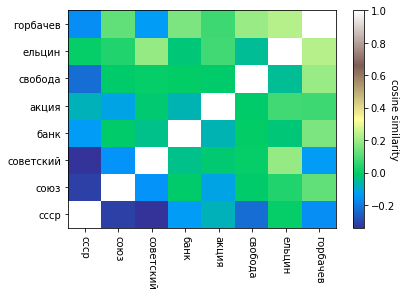

In [217]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [224]:
targetDocs = df['filename'][0::100]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = izD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, izD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

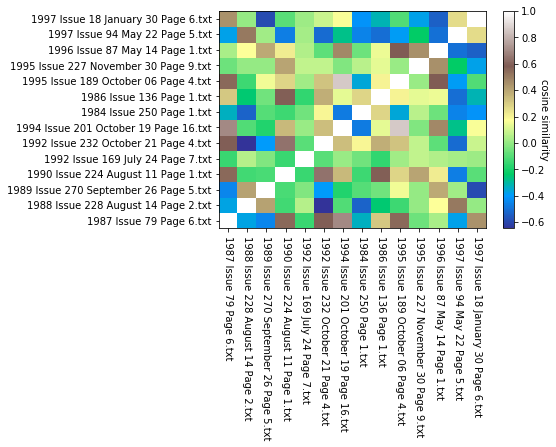

In [225]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [226]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = izD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, izD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

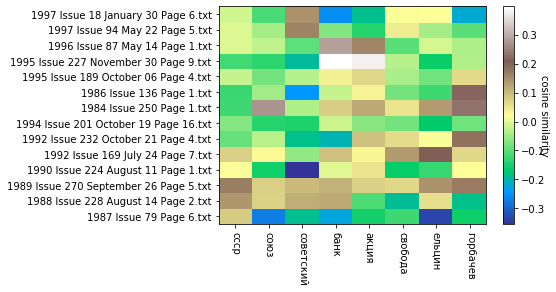

In [227]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

Unsuprisingly, the documents further open up the story explored above. They too note the distance between the soviet and market and democratic discourses. Looking at the docuemnts it also clearly becomes evident that the Soviet discourse dominates the 1980's while the other discourses domiante the 1990s. This is to be expected. 

However, if we examine the map of cosine similarity of every 100th docuemnt, then something very interesting emerges. We see that all of the documents that are the furthest apart, temporally, are also quite similar. This is a bit surprising. One possible answer comes in the plot of the cosine similarity of the keywords vs documents. We see that despite the fact that the Soviet Union was talked about a lot initially, and then barely talked about at all, discussions about the USSR picked up again later into the 1990's, potentially indicating that as the economic situation worsenned, comparisons to te USSR became ever more striking. 

In other areas, this analysis suggests that there is more similarity between documents in the corpus than I imagined. The keywords bank and stock exchange, for example, appear quite strongly in the late 1980's and late 1990's.

# Projection

In [103]:
izTargetWords = ['союз', 'ссср', 'совет', 'Россия', 'федерация', 'колхоз', 'валюта', 'народ', 'партия', 'предприятие', 'рубль', 'секретарь', 'председатель']
izTargetWords +=['выбор', 'депутат', 'банк', 'свобода', 'голос', 'проблема', 'демократия', 'демократ', 'воля', 'избирать', 'рынок', 'министр']

In [104]:
wordsSubMatrix = []
for word in izTargetWords:
    wordsSubMatrix.append(izvestiiaW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [105]:
pcaWordsiz = sklearn.decomposition.PCA(n_components = 15).fit(wordsSubMatrix)
reducedPCA_dataiz = pcaWordsiz.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsiz = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataiz)

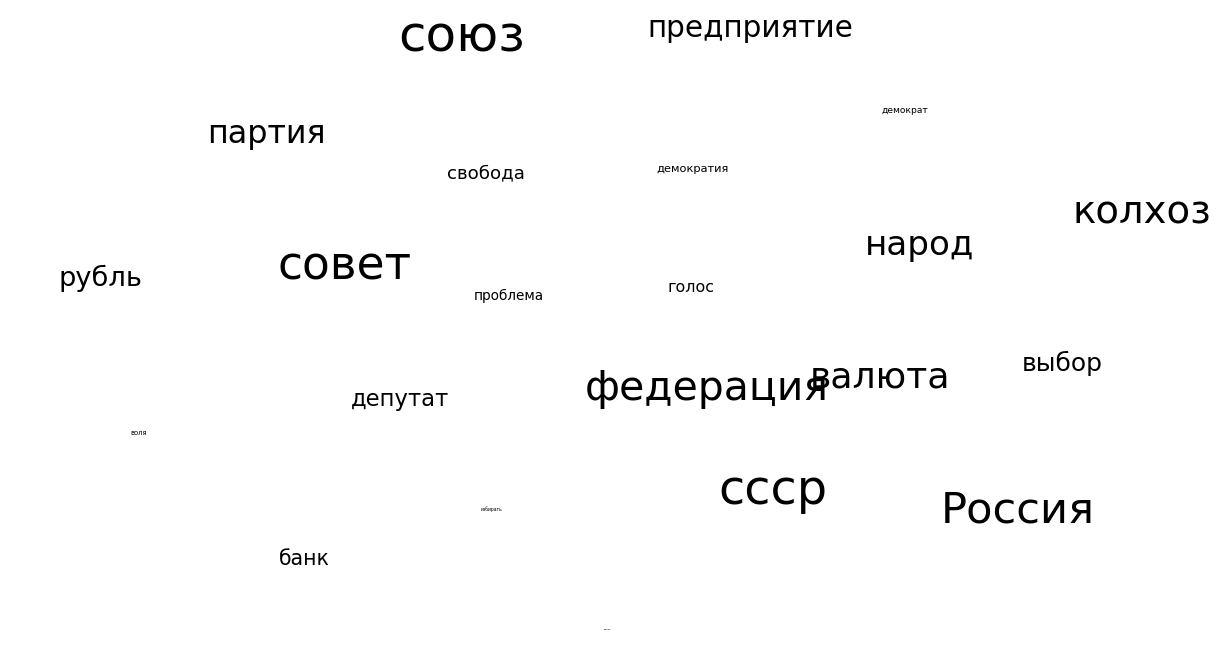

In [106]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsiz[:, 0], tsneWordsiz[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(izTargetWords):
    ax.annotate(word, (tsneWordsiz[:, 0][i],tsneWordsiz[:, 1][i]), size =  50 * (len(izTargetWords) - i) / len(izTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [100]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [307]:
state = dimension(izvestiiaW2V, ['ссср','союз','совет'], ['федерация', 'Россия', 'демократия'])
politics = dimension(izvestiiaW2V, ['выбор','депутат','голос'], ['министр', 'секретарь', 'председатель'])

In [308]:
freedom = ["воля","свобода","слово"]

In [309]:
def makeDF(model, word_list):
    s = []
    p = []
    e = []
    for word in word_list:
        s.append(sklearn.metrics.pairwise.cosine_similarity(izvestiiaW2V[word].reshape(1,-1), state.reshape(1,-1))[0][0])
        p.append(sklearn.metrics.pairwise.cosine_similarity(izvestiiaW2V[word].reshape(1,-1), politics.reshape(1,-1))[0][0])
        e.append(sklearn.metrics.pairwise.cosine_similarity(izvestiiaW2V[word].reshape(1,-1), economy.reshape(1,-1))[0][0])
    df1 = pandas.DataFrame({'state': s, 'politics': p, 'economy': e}, index = word_list)
    return df1

In [310]:
freedf = makeDF(izvestiiaW2V, freedom) 

In [311]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

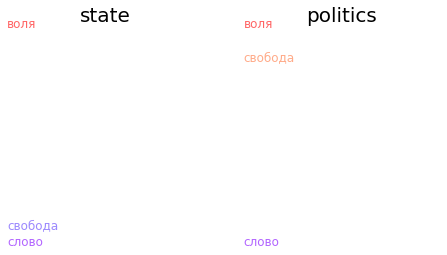

In [313]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, freedf, 'state')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, freedf, 'politics')

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<span style="color:red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

It was difficult comming up with dimensions for this, because it a bit difficult to define what words can relate to something as abstract as communism, for example. I decided to plot "freedom" because I think that that was a fairly disputed concept in the 1980s and 1990s in Russia, so it would be interesting to see where it falls in terms of the dimensions of politics and state. In both cases free will was on the opposite side of the freedom of speech, but freedom bounced from one extreme to the other. The dichotomy between elections/choice and communism/dictatorship  probably accounts for that difference.

# Linguistic Change or Difference

In [232]:
df1 = pandas.read_json('izvestiia_sent.json')

In [236]:
df1

,year,filename,sent_tokens
0,1984,1984 Issue 082 Page 1.txt,"[[правовое, воспитание, молодежиллдин, мз, дне..."
1,1984,1984 Issue 082 Page 2.txt,"[[земля, ,, план, и, людимы, любим, говорить, ..."
2,1984,1984 Issue 082 Page 3.txt,"[[в, президиумах, доеных, советов, союзных, ре..."
3,1984,1984 Issue 082 Page 4.txt,"[[по, странам, и, континентамновостилаоспуть, ..."
4,1984,1984 Issue 082 Page 5.txt,"[[фотоатлас, известийвьетнамизо, дня, в, дань,..."
...,...,...,...
1299,1997,1997 Issue 94 May 22 Page 5.txt,"[[известия, мая, года, ирина, суворова, илья, ..."
1300,1997,1997 Issue 94 May 22 Page 6.txt,"[[известиябольшиеозможностиростадля, заинтерес..."
1301,1997,1997 Issue 94 May 22 Page 7.txt,"[[брокерская, компанияфыочрсы, и, опционы, на,..."
1302,1997,1997 Issue 94 May 22 Page 8.txt,"[[мая, г., ,, четвергбизнес, и, экономикафинан..."


In [118]:
import copy

In [119]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [237]:
def compareModels(df1, category, text_column_name='sent_tokens', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df1, category, text_column_name, sort)
    cats = sorted(set(df1[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [240]:
def rawModels(df1, category, text_column_name='sent_tokens', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df1[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df1[df1[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [241]:
rawEmbeddings, comparedEmbeddings = compareModels(df1, 'year')

In [242]:
rawEmbeddings.keys()

dict_keys([1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])

In [243]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

ссср


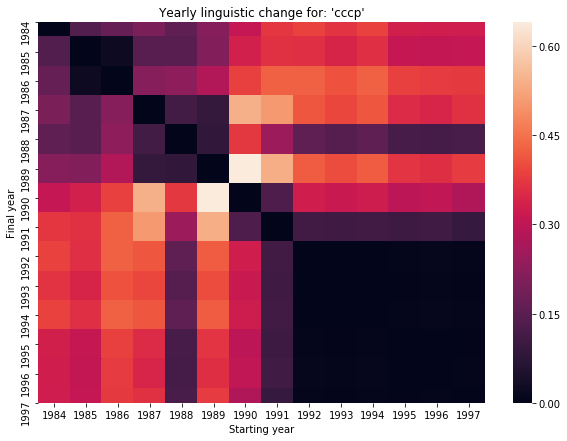

In [244]:
targetWord = 'ссср'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

ссср


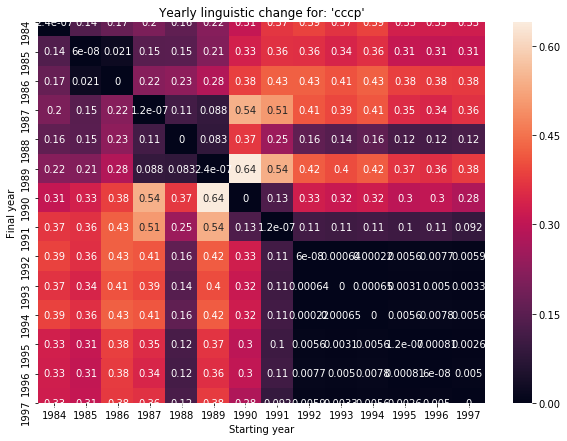

In [245]:
targetWord = 'ссср'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = True) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [246]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [247]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 1659 words to compare


In [300]:
wordDivergences[:40]

[('в.', 5.88282884657383),
 ('г.', 5.640949197113514),
 ('а.', 5.138058066368103),
 ('м.', 5.023663312196732),
 ('к.', 4.957236975431442),
 ('и.', 4.491626709699631),
 ('н.', 4.380009353160858),
 ('ссср', 3.687033951282501),
 ('д.', 3.6578379571437836),
 ('г', 3.253180146217346),
 ('совета', 3.2190012335777283),
 ('л.', 3.1636140942573547),
 ('с.', 2.9682118892669678),
 ('м', 2.892179250717163),
 ('т.', 2.8163591027259827),
 ('секретарь', 2.6234918236732483),
 ('верховного', 2.5850272178649902),
 ('н', 2.563860833644867),
 ('заместитель', 2.5180302262306213),
 ('министров', 2.5140129923820496),
 ('л', 2.5109869241714478),
 ('т', 2.4022801518440247),
 ('!', 2.3824762403964996),
 ('председатель', 2.2258560061454773),
 ('п', 2.1773945689201355),
 ('п.', 2.097457766532898),
 ('не', 2.058135449886322),
 ('председателя', 2.0415455102920532),
 ('.', 2.029260575771332),
 ('р', 2.0277827382087708),
 ('министра', 2.01390939950943),
 ('первый', 1.9932477474212646),
 ('д', 1.967625379562378),
 ('м

In [304]:
wordDivergences[-40:]

[('действий', 0.024268746376037598),
 ('успешно', 0.023893415927886963),
 ('наших', 0.023854374885559082),
 ('новое', 0.02344036102294922),
 ('ныне', 0.023429036140441895),
 ('событий', 0.02331143617630005),
 ('полностью', 0.023208439350128174),
 ('борьба', 0.022957324981689453),
 ('провести', 0.02283954620361328),
 ('данные', 0.0228080153465271),
 ('свой', 0.022788047790527344),
 ('специалисты', 0.02273106575012207),
 ('внимание', 0.02240002155303955),
 ('европе', 0.021819114685058594),
 ('решили', 0.021814823150634766),
 ('помощи', 0.021607935428619385),
 ('которыми', 0.021436452865600586),
 ('включая', 0.021435439586639404),
 ('производство', 0.02115565538406372),
 ('ряд', 0.020879030227661133),
 ('начал', 0.020855307579040527),
 ('военные', 0.020229816436767578),
 ('серьезные', 0.02011585235595703),
 ('необходимость', 0.019770562648773193),
 ('впервые', 0.01975160837173462),
 ('которого', 0.018629729747772217),
 ('роль', 0.01842266321182251),
 ('новую', 0.018192589282989502),
 ('ср

совета


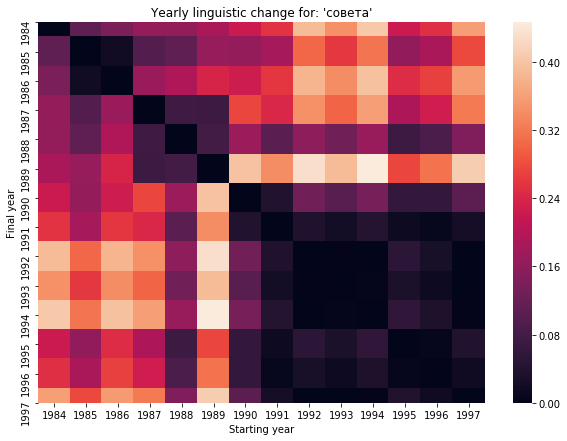

In [303]:
targetWord = wordDivergences[10][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

военные


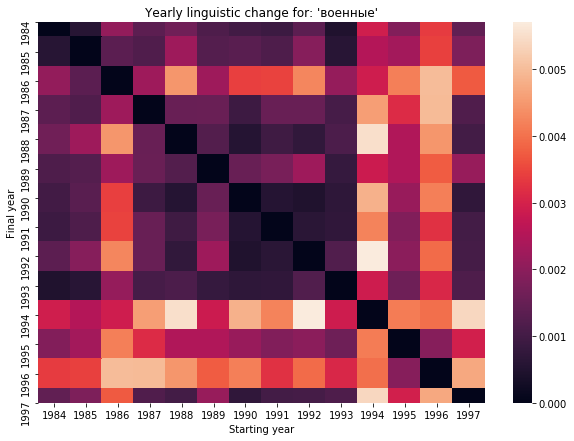

In [306]:
targetWord = wordDivergences[-19][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

<span style="color:red">**Do only 4a or 4b.** Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space? 
   

The words that changed the most all relate to a Soviet discourse. Things such as minister, Soviet, Secretary, and even USSR are all in the most divergent words. On the other hand, words such as military, and battle, are in the lease divergent. 

War, as they say, never changes.